In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_bar_chart(x, y, xlabel='', ylabel='', title='', figsize=(12,6)):
    fig, ax = plt.subplots(figsize=figsize)
    sns.barplot(x=x, y=y, palette='Blues_d', ax=ax)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.set_title(title, fontsize=18)
    plt.xticks(rotation=90)
    plt.show()

c:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\google\auth\_default.py:78: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


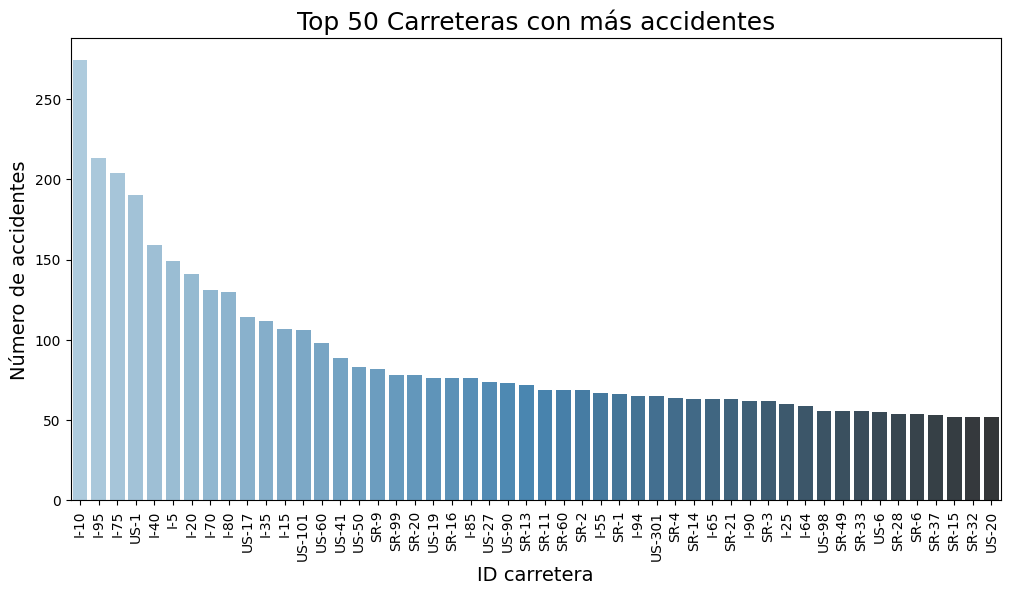

In [2]:
from google.cloud import bigquery
client = bigquery.Client(project='poto-382221')
query = """
    SELECT trafficway_identifier, COUNT(*) as num_accidents
    FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
    WHERE trafficway_identifier IS NOT NULL
    GROUP BY trafficway_identifier
    ORDER BY num_accidents DESC
    LIMIT 50
"""

# Ejecutar la consulta
query_job = client.query(query)

# Convertir los resultados a un DataFrame de Pandas
df = query_job.to_dataframe()

# Graficar el número de accidentes para cada identificador de carretera
plot_bar_chart(x=df['trafficway_identifier'], y=df['num_accidents'], xlabel='ID carretera', ylabel='Número de accidentes', title='Top 50 Carreteras con más accidentes')